In [1]:
# Note submitted in BSC along with link to completed homework that indicated
# that for sake of best data visualization, I did not include traditional legends in a box.
# I used annotations instead but still included the code for legend commented out. 

# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Load and read data files
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_trial = pd.read_csv(clinical_trial_data_to_load)

# Limit data to only these treatments: Capomulin, Infubinol, Ketapril, and Placebo
df_mouse = df_mouse.drop(df_mouse[(df_mouse.Drug == 'Stelasyn') | 
                                  (df_mouse.Drug == 'Naftisol')| 
                                  (df_mouse.Drug == 'Ceftamin')| 
                                  (df_mouse.Drug == 'Propriva') | 
                                  (df_mouse.Drug == 'Zoniferol')| 
                                  (df_mouse.Drug == 'Ramicane')].index)

# Combine the data into a single dataset
df = df_mouse.merge(df_trial,on='Mouse ID')
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,q119,Ketapril,0,45.000000,0
1,q119,Ketapril,5,47.864440,0
2,q119,Ketapril,10,51.236606,0
3,n923,Ketapril,0,45.000000,0
4,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [2]:
# Get the mean tumor volume data grouped by drug and timepoint 
drug_time_group = df.groupby(['Drug','Timepoint'])

# Convert to dataframe
df_tumor_volume = pd.DataFrame(drug_time_group['Tumor Volume (mm3)'].mean())
df_tumor_volume.head()

# Add standard error of tumor volumes to dataframe
df_tumor_volume['Tumor Vol Sem'] = drug_time_group['Tumor Volume (mm3)'].sem()
df_tumor_volume.head()

Tumor Volume (mm3)  Tumor Vol Sem
Drug      Timepoint                                   
Capomulin 0                   45.000000       0.000000
          5                   44.266086       0.448593
          10                  43.084291       0.702684
          15                  42.064317       0.838617
          20                  40.716325       0.909731

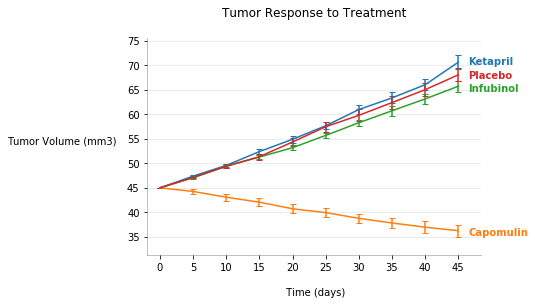

In [3]:
# Generate the plot with goal 
fig, ax = plt.subplots()

# Loop through the dataframe to fill out the chart
for drug in df['Drug'].unique():
    drug_data = df_tumor_volume.loc[drug].reset_index()
    x_axis = drug_data.loc[:,'Timepoint'].values 
    y_axis = drug_data.loc[:,'Tumor Volume (mm3)'].values
    std_err = drug_data.loc[:,'Tumor Vol Sem'].values 
    ax.errorbar(x_axis,y_axis,yerr=std_err,capsize=3, elinewidth=0, markeredgewidth=1,label=drug)

# Chart design basics
plt.title('Tumor Response to Treatment\n',weight='medium')
plt.xlabel('\n Time (days)')
plt.ylabel('Tumor Volume (mm3)  ',rotation=0,ha='right')
plt.xlim(min(x_axis)-2,max(x_axis)+3.5)
plt.ylim(min(df_tumor_volume['Tumor Volume (mm3)'])-5,max(df_tumor_volume['Tumor Volume (mm3)'])+5)
plt.grid(axis='y',alpha=.3)

#If I wanted to do a traditional legend, I would have placed it outside of the chart with this code:
#plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0,frameon=False)
    
# But I want to annotate for clearer viz
plt.xticks(np.arange(min(df['Timepoint']), max(df['Timepoint']+2), 5.0))
plt.annotate('Ketapril',((max(x_axis)+1.5),df_tumor_volume.loc['Ketapril','Tumor Volume (mm3)'][45]-.5),ha='left',color='C0',weight='bold')
plt.annotate('Capomulin',((max(x_axis)+1.5),df_tumor_volume.loc['Capomulin','Tumor Volume (mm3)'][45]-1),ha='left',color='C1',weight='bold')
plt.annotate('Infubinol',((max(x_axis)+1.5),df_tumor_volume.loc['Infubinol','Tumor Volume (mm3)'][45]-1),ha='left',color='C2',weight='bold')
plt.annotate('Placebo',((max(x_axis)+1.5),df_tumor_volume.loc['Placebo','Tumor Volume (mm3)'][45]-.75),ha='left',color='C3',weight='bold')

# Additional viz adjustments
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

# Save the figure in a way that perserves special formatting
plt.savefig('Tumor_Vol.jpg',bbox_inches = "tight")
 
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [4]:
# Get the mean tumor volume data grouped by drug and timepoint 
df_met_mean = pd.DataFrame(drug_time_group['Metastatic Sites'].mean())

# Get the standard error associated with met. sites grouped by drug and timepoint 
df_met_mean['Metastatic Sem'] = drug_time_group['Metastatic Sites'].sem()
df_met_mean.head()

Metastatic Sites  Metastatic Sem
Drug      Timepoint                                  
Capomulin 0                  0.000000        0.000000
          5                  0.160000        0.074833
          10                 0.320000        0.125433
          15                 0.375000        0.132048
          20                 0.652174        0.161621

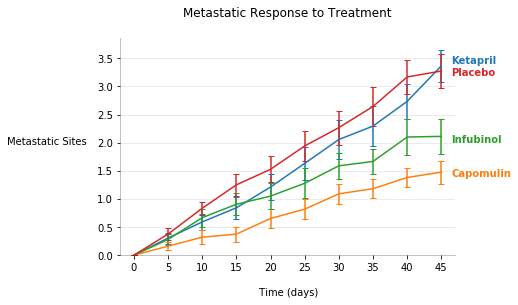

In [5]:
# Generate the plot with error bars
fig, ax = plt.subplots()
 
# Loop through the dataframe to get the values for the chart
for drug in df['Drug'].unique():
    drug_data = df_met_mean.loc[drug].reset_index()
    x_axis = drug_data.loc[:,'Timepoint'].values 
    y_axis = drug_data.loc[:,'Metastatic Sites'].values 
    std_err = drug_data.loc[:,'Metastatic Sem'].values 
    ax.errorbar(x_axis,y_axis,yerr=std_err,capsize=3, elinewidth=0, markeredgewidth=1,label=drug)

# Chart design basics
plt.title('Metastatic Response to Treatment\n',weight='medium')
plt.xlabel('\n Time (days)')
plt.ylabel('Metastatic Sites  ',rotation=0,ha='right')
plt.xlim(min(x_axis)-2,max(x_axis)+2)
plt.ylim(min(df_met_mean['Metastatic Sites']),max(df_met_mean['Metastatic Sites']+.5))
plt.grid(axis='y',alpha=.3)

#If I wanted to do a traditional legend:
#plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0,frameon=False)
       
# But I want to annotate here for clearer viz
plt.xticks(np.arange(min(df['Timepoint']), max(df['Timepoint']+2), 5.0))
plt.annotate('Ketapril',((max(x_axis)+1.5),3.4),ha='left',color='C0',weight='bold')
plt.annotate('Capomulin',((max(x_axis)+1.5),1.4),ha='left',color='C1',weight='bold')
plt.annotate('Infubinol',((max(x_axis)+1.5),2),ha='left',color='C2',weight='bold')
plt.annotate('Placebo',((max(x_axis)+1.5),3.2),ha='left',color='C3',weight='bold')

# Additional clean up
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

# Save the figure in a way that perserves special formatting
plt.savefig('Metastatic_Sites.jpg',bbox_inches = "tight")
 
# Show the Figure
plt.show()

## Survival Rates

In [6]:
# Get the survival data grouped by drug and timepoint 
df_mice_num = pd.DataFrame(drug_time_group['Mouse ID'].nunique())
df_mice_num['Survival Rate']=(df_mice_num['Mouse ID']/25*100)
df_mice_num.rename(columns={'Mouse ID':'Mice Alive'},inplace=True)
df_mice_num.head()

Mice Alive  Survival Rate
Drug      Timepoint                           
Capomulin 0                  25          100.0
          5                  25          100.0
          10                 25          100.0
          15                 24           96.0
          20                 23           92.0

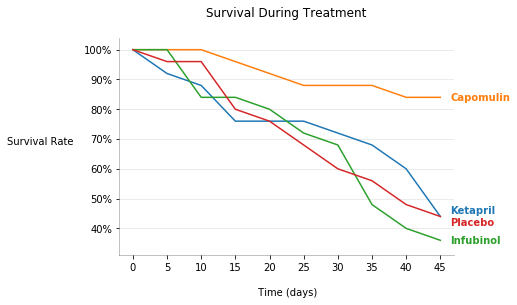

In [7]:
# Generate the plot 
fig, ax = plt.subplots()
 
# Loop through the dataframe to get the values for the chart
for drug in df['Drug'].unique():
    drug_data = df_mice_num.loc[drug].reset_index()
    x_axis = drug_data.loc[:,'Timepoint'].values 
    y_axis = drug_data.loc[:,'Survival Rate'].values 
    ax.errorbar(x_axis,y_axis, capsize=3, elinewidth=0, markeredgewidth=1,label=drug) #yerr=std_err,

# Chart design basics
plt.title('Survival During Treatment\n',weight='medium')
plt.xlabel('\n Time (days)')
plt.ylabel('Survival Rate  ',rotation=0,ha='right')
plt.xlim(min(x_axis)-2,max(x_axis)+2)
plt.ylim(min(df_mice_num['Survival Rate']-5),max(df_mice_num['Survival Rate']+4))
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.grid(axis='y',alpha=.3)

#If I wanted to do a traditional legend:
#plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0,frameon=False)

# But I want to annotate here for clearer viz
# **** way to automate color based on presets?
plt.xticks(np.arange(min(df['Timepoint']), max(df['Timepoint']+2), 5.0))
plt.annotate('Ketapril',((max(x_axis)+1.5),45),ha='left',color='C0',weight='bold')
plt.annotate('Capomulin',((max(x_axis)+1.5),83),ha='left',color='C1',weight='bold')
plt.annotate('Infubinol',((max(x_axis)+1.5),35),ha='left',color='C2',weight='bold')
plt.annotate('Placebo',((max(x_axis)+1.5),41),ha='left',color='C3',weight='bold')

# Additional clean up
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(alpha=.3)
ax.spines['bottom'].set_alpha(alpha=.3)

# Save the figure in a way that perserves special formatting
plt.savefig('Survival_Rate.jpg',bbox_inches = "tight")
 
# Show the Figure
plt.show()

## Summary Bar Graph

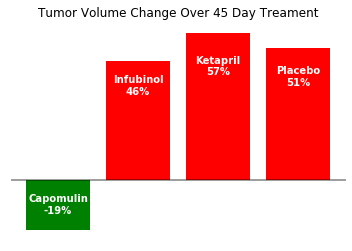

In [8]:
# Calculate the percent changes for each drug  
tumor_change=[]
drugs=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
start_value = df_tumor_volume['Tumor Volume (mm3)'][0]
for drug in drugs:
    tumor_change.append((df_tumor_volume.loc[(drug,start_value),'Tumor Volume (mm3)']-start_value)/start_value)

# Set up for bar formatting/labels - intentionally do not have left axis labels which would have been duplicative of values in each bar  
N = 4
ind=np.arange(N)
width=0.8
fig,ax = plt.subplots()
bar_color_data = {'values':[tumor_change[0],tumor_change[1],tumor_change[2],tumor_change[3]]}
bar_color = pd.DataFrame(bar_color_data,columns=['values'])
chart_num= plt.bar(drugs,tumor_change, color =(bar_color['values']<0).map({True:'g',False:'r'}))
ax.set_yticks([])
ax.set_xticks([])

# Text labels for each bar
def autolabel(bars):
    count=0
    for bar in bars:
        height = bar.get_height()
        ax.text(bar. get_x() + bar.get_width()/2., .7*height,
                ((drugs[count])+'\n'+str(int(height*100))+'%'),color="w",weight='bold',
                ha='center', va='bottom')
        count +=1
autolabel(chart_num)

# Additional chart elements and formatting
plt.title('Tumor Volume Change Over 45 Day Treament')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(False)
ax.spines['bottom'].set_alpha(False)
ax.axhline(0, color ='k',alpha=.5)

# Save the figure in a way that perserves special formatting
plt.savefig('Summary.jpg',bbox_inches = "tight")

# Show the plot
plt.show()

In [9]:
# See document "Tumor_Treatment_Assessment_S_Clark" for analysis of data. 